In [ ]:
密度聚类函数说明
cluster.DBSCAN(eps=0.5, min_samples=5, metric=‘euclidean’, p=None)
eps：用于设置密度聚类中的e领域，即半径，默认为0.5
min_samples：用于设置e领域内最少的样本量，默认为5
metric：用于指定计算点之间距离的方法，默认为欧氏距离
p：当参数metric为闵可夫斯基（'minkowski'）距离时，p=1，表示计算点之间的曼哈顿距离；p=2，表示计算点之间的欧氏距离；该参数的默认值为2

In [1]:
# 导入第三方模块
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster

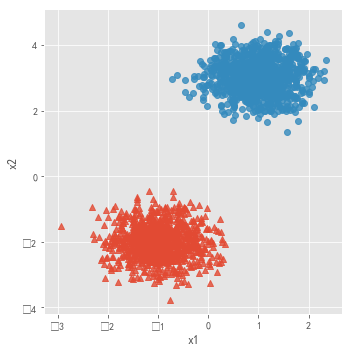

In [2]:
# 模拟数据集
X,y = make_blobs(n_samples = 2000, centers = [[-1,-2],[1,3]], cluster_std = [0.5,0.5], random_state = 1234)
# 将模拟得到的数组转换为数据框，用于绘图
plot_data = pd.DataFrame(np.column_stack((X,y)), columns = ['x1','x2','y'])
# 设置绘图风格
plt.style.use('ggplot')
# 绘制散点图（用不同的形状代表不同的簇）
sns.lmplot('x1', 'x2', data = plot_data, hue = 'y',markers = ['^','o'],
           fit_reg = False, legend = False)
# 显示图形
plt.show()

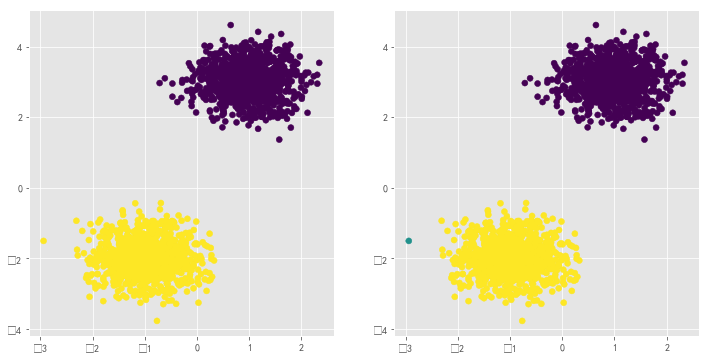

In [3]:
# 导入第三方模块
from sklearn import cluster
# 构建Kmeans聚类和密度聚类
kmeans = cluster.KMeans(n_clusters=2, random_state=1234)
kmeans.fit(X)
dbscan = cluster.DBSCAN(eps = 0.5, min_samples = 10)
dbscan.fit(X)
# 将Kmeans聚类和密度聚类的簇标签添加到数据框中
plot_data['kmeans_label'] = kmeans.labels_
plot_data['dbscan_label'] = dbscan.labels_

# 绘制聚类效果图
# 设置大图框的长和高
plt.figure(figsize = (12,6))
# 设置第一个子图的布局
ax1 = plt.subplot2grid(shape = (1,2), loc = (0,0))
# 绘制散点图
ax1.scatter(plot_data.x1, plot_data.x2, c = plot_data.kmeans_label)
# 设置第二个子图的布局
ax2 = plt.subplot2grid(shape = (1,2), loc = (0,1))
# 绘制散点图(为了使Kmeans聚类和密度聚类的效果图颜色一致，通过序列的map“方法”对颜色作重映射)
ax2.scatter(plot_data.x1, plot_data.x2, c=plot_data.dbscan_label.map({-1:1,0:2,1:0}))
# 显示图形
plt.show()

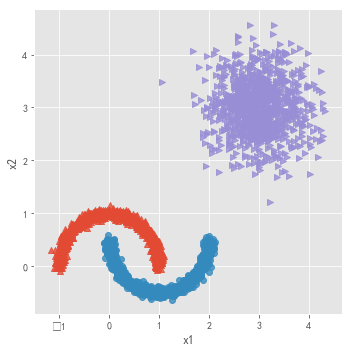

In [4]:
# 导入第三方模块
from sklearn.datasets.samples_generator import make_moons
# 构造非球形样本点
X1,y1 = make_moons(n_samples=2000, noise = 0.05, random_state = 1234)
# 构造球形样本点
X2,y2 = make_blobs(n_samples=1000, centers = [[3,3]], cluster_std = 0.5, random_state = 1234)
# 将y2的值替换为2(为了避免与y1的值冲突，因为原始y1和y2中都有0这个值)
y2 = np.where(y2 == 0,2,0)
# 将模拟得到的数组转换为数据框，用于绘图
plot_data = pd.DataFrame(np.row_stack([np.column_stack((X1,y1)),np.column_stack((X2,y2))]), columns = ['x1','x2','y'])

# 绘制散点图（用不同的形状代表不同的簇）
sns.lmplot('x1', 'x2', data = plot_data, hue = 'y',markers = ['^','o','>'],
           fit_reg = False, legend = False)
# 显示图形
plt.show()

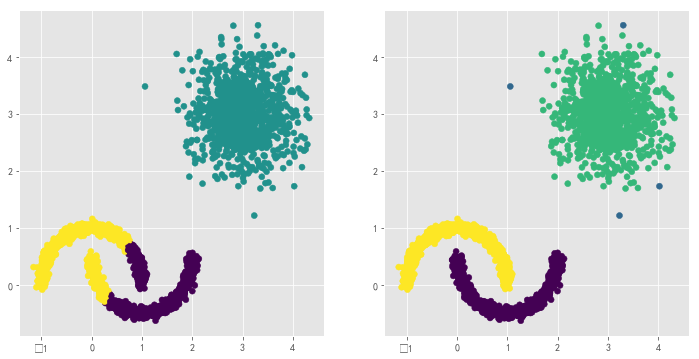

In [5]:
# 构建Kmeans聚类和密度聚类
kmeans = cluster.KMeans(n_clusters=3, random_state=1234)
kmeans.fit(plot_data[['x1','x2']])
dbscan = cluster.DBSCAN(eps = 0.3, min_samples = 5)
dbscan.fit(plot_data[['x1','x2']])
# 将Kmeans聚类和密度聚类的簇标签添加到数据框中
plot_data['kmeans_label'] = kmeans.labels_
plot_data['dbscan_label'] = dbscan.labels_

# 绘制聚类效果图
# 设置大图框的长和高
plt.figure(figsize = (12,6))
# 设置第一个子图的布局
ax1 = plt.subplot2grid(shape = (1,2), loc = (0,0))
# 绘制散点图
ax1.scatter(plot_data.x1, plot_data.x2, c = plot_data.kmeans_label)
# 设置第二个子图的布局
ax2 = plt.subplot2grid(shape = (1,2), loc = (0,1))
# 绘制散点图(为了使Kmeans聚类和密度聚类的效果图颜色一致，通过序列的map“方法”对颜色作重映射)
ax2.scatter(plot_data.x1, plot_data.x2, c=plot_data.dbscan_label.map({-1:1,0:0,1:3,2:2}))
# 显示图形
plt.show()

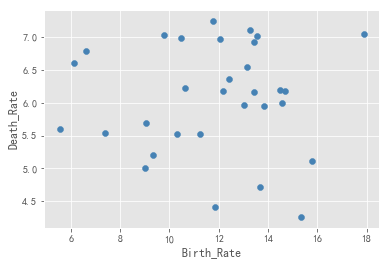

In [6]:
# 读取外部数据
Province = pd.read_excel(r'Province.xlsx')
Province.head()
# 绘制出生率与死亡率散点图
plt.scatter(Province.Birth_Rate, Province.Death_Rate, c = 'steelblue')
# 添加轴标签
plt.xlabel('Birth_Rate')
plt.ylabel('Death_Rate')
# 显示图形
plt.show()

In [7]:
# 读入第三方包
from sklearn import preprocessing
# 选取建模的变量
predictors = ['Birth_Rate','Death_Rate']
# 变量的标准化处理
X = preprocessing.scale(Province[predictors])
X = pd.DataFrame(X)

In [8]:
# 构建空列表，用于保存不同参数组合下的结果
res = []
# 迭代不同的eps值
for eps in np.arange(0.001,1,0.05):
    # 迭代不同的min_samples值
    for min_samples in range(2,10):
        dbscan = cluster.DBSCAN(eps = eps, min_samples = min_samples)
        # 模型拟合
        dbscan.fit(X)
        # 统计各参数组合下的聚类个数（-1表示异常点）
        n_clusters = len([i for i in set(dbscan.labels_) if i != -1])
        # 异常点的个数
        outliners = np.sum(np.where(dbscan.labels_ == -1, 1,0))
        # 统计每个簇的样本个数
        stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
        res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners,'stats':stats})
# 将迭代后的结果存储到数据框中        
df = pd.DataFrame(res)
df
# 根据条件筛选合理的参数组合
df.loc[df.n_clusters == 3, :]

,eps,min_samples,n_clusters,outliners,stats
40,0.251,2,3,23,[3 3 2]
57,0.351,3,3,19,[6 3 3]
88,0.551,2,3,7,[17 5 2]
96,0.601,2,3,7,[17 5 2]
104,0.651,2,3,5,[17 7 2]
112,0.701,2,3,5,[17 7 2]
129,0.801,3,3,4,[17 7 3]
136,0.851,2,3,2,[24 3 2]
144,0.901,2,3,1,[24 4 2]
152,0.951,2,3,1,[24 4 2]


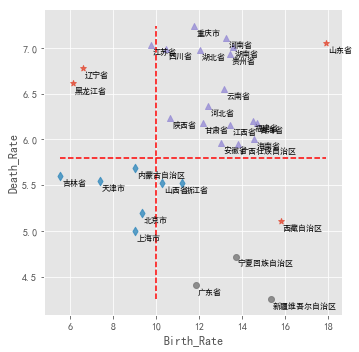

In [10]:
# 中文乱码和坐标轴负号的处理
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 利用上述的参数组合值，重建密度聚类算法
dbscan = cluster.DBSCAN(eps = 0.801, min_samples = 3)
# 模型拟合
dbscan.fit(X)
Province['dbscan_label'] = dbscan.labels_
# 绘制聚类聚类的效果散点图
sns.lmplot(x = 'Birth_Rate', y = 'Death_Rate', hue = 'dbscan_label', data = Province,
           markers = ['*','d','^','o'], fit_reg = False, legend = False)
# 添加省份标签
for x,y,text in zip(Province.Birth_Rate,Province.Death_Rate, Province.Province):
    plt.text(x+0.1,y-0.1,text, size = 8)
# 添加参考线
plt.hlines(y = 5.8, xmin = Province.Birth_Rate.min(), xmax = Province.Birth_Rate.max(), 
           linestyles = '--', colors = 'red')
plt.vlines(x = 10, ymin = Province.Death_Rate.min(), ymax = Province.Death_Rate.max(), 
           linestyles = '--', colors = 'red')
# 添加轴标签
plt.xlabel('Birth_Rate')
plt.ylabel('Death_Rate')
# 显示图形
plt.show()

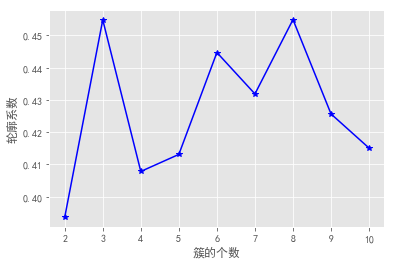

In [12]:
# 导入第三方模块
from sklearn import metrics
# 构造自定义函数，用于绘制不同k值和对应轮廓系数的折线图
def k_silhouette(X, clusters):
    K = range(2,clusters+1)
    # 构建空列表，用于存储个中簇数下的轮廓系数
    S = []
    for k in K:
        kmeans = cluster.KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        # 调用字模块metrics中的silhouette_score函数，计算轮廓系数
        S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

    # 中文和负号的正常显示
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 设置绘图风格
    plt.style.use('ggplot')    
    # 绘制K的个数与轮廓系数的关系
    plt.plot(K, S, 'b*-')
    plt.xlabel('簇的个数')
    plt.ylabel('轮廓系数')
    # 显示图形
    plt.show()
    
# 聚类个数的探索
k_silhouette(X, clusters = 10)

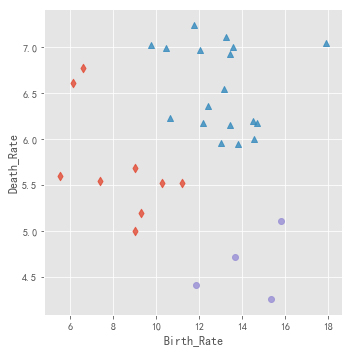

In [13]:
# 利用Kmeans聚类
kmeans = cluster.KMeans(n_clusters = 3)
# 模型拟合
kmeans.fit(X)
Province['kmeans_label'] = kmeans.labels_
# 绘制Kmeans聚类的效果散点图
sns.lmplot(x = 'Birth_Rate', y = 'Death_Rate', hue = 'kmeans_label', data = Province,
           markers = ['d','^','o'], fit_reg = False, legend = False)
# 添加轴标签
plt.xlabel('Birth_Rate')
plt.ylabel('Death_Rate')
plt.show()